<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Assignment: Exploring and Preparing Data


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab


In [1]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [2]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

In [ ]:
## Exploratory Data Analysis


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [3]:
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = await fetch(URL)
dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())
df=pd.read_csv(dataset_part_2_csv)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


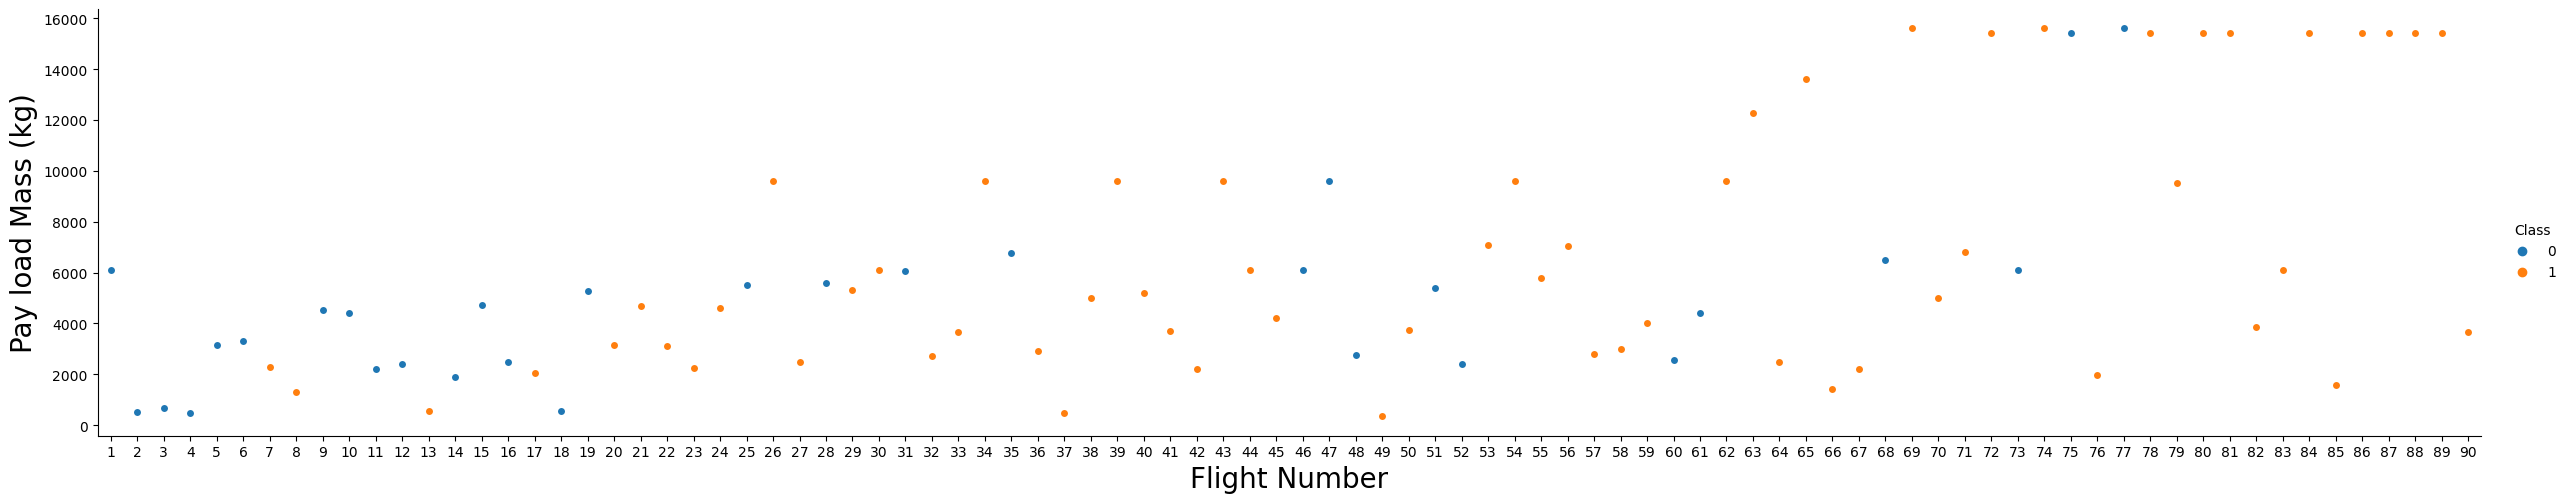

In [4]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.


Next, let's drill down to each site visualize its detailed launch records.


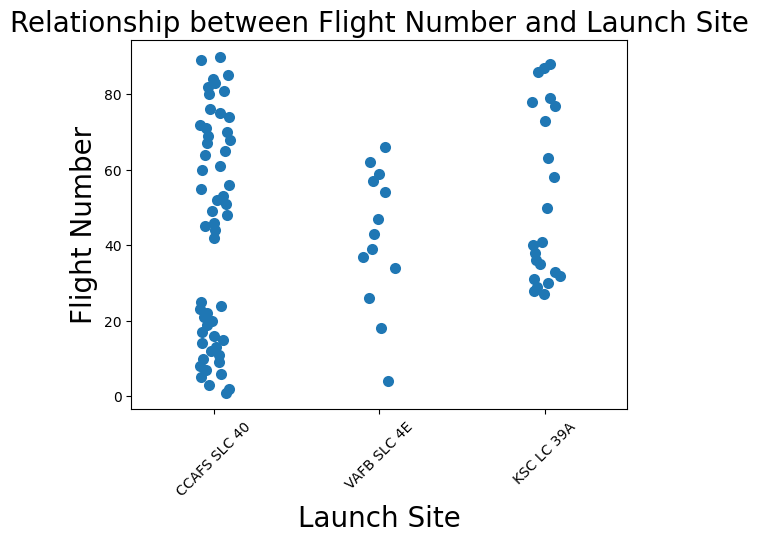

In [5]:
### TASK 1: Visualize the relationship between Flight Number and Launch Site

sns.stripplot(x="LaunchSite", y="FlightNumber", data=df, jitter=True, size=8)
plt.xlabel("Launch Site", fontsize=20)
plt.ylabel("Flight Number", fontsize=20)
plt.title("Relationship between Flight Number and Launch Site", fontsize=20)
plt.xticks(rotation=45)
plt.show()


Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


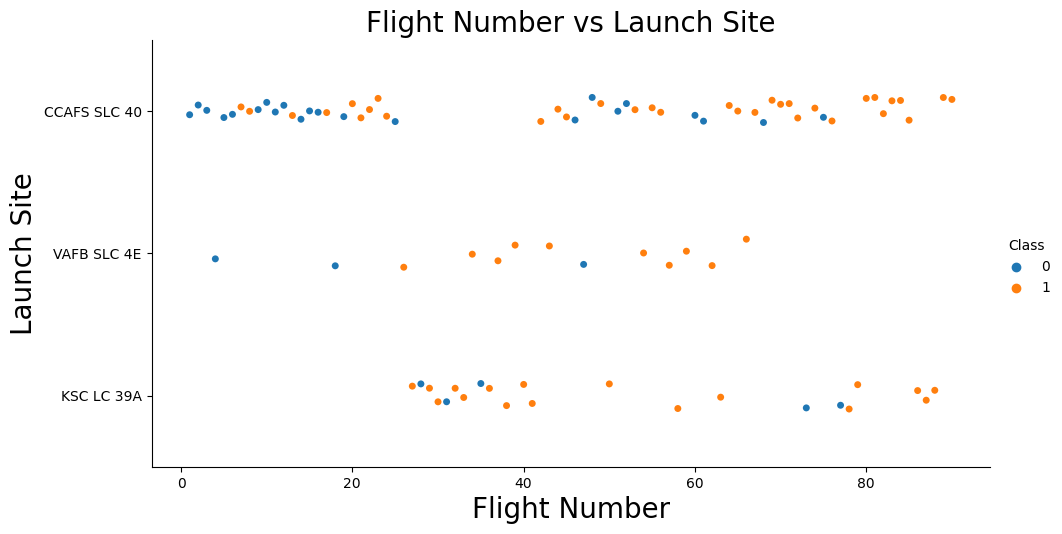

In [6]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value

sns.catplot(x="FlightNumber", y="LaunchSite", hue="Class", data=df, kind="strip", jitter=True, aspect=2)
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Launch Site", fontsize=20)
plt.title("Flight Number vs Launch Site", fontsize=20)
plt.show()


Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


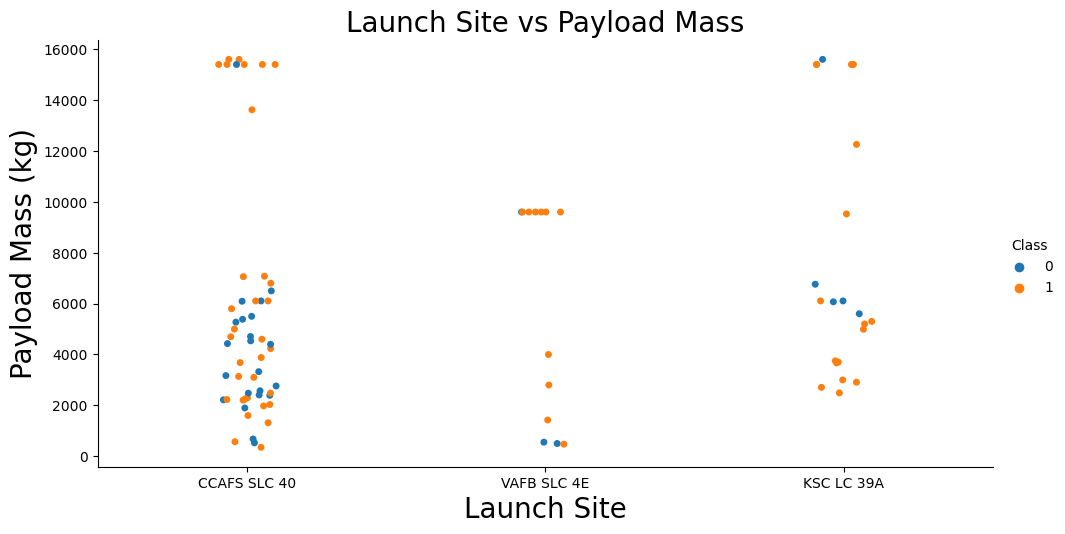

In [7]:
### TASK 2: Visualize the relationship between Payload and Launch Site
sns.catplot(x="LaunchSite", y="PayloadMass", hue="Class", data=df, kind="strip", jitter=True, aspect=2)
plt.xlabel("Launch Site", fontsize=20)
plt.ylabel("Payload Mass (kg)", fontsize=20)
plt.title("Launch Site vs Payload Mass", fontsize=20)
plt.show()



We also want to observe if there is any relationship between launch sites and their payload mass.


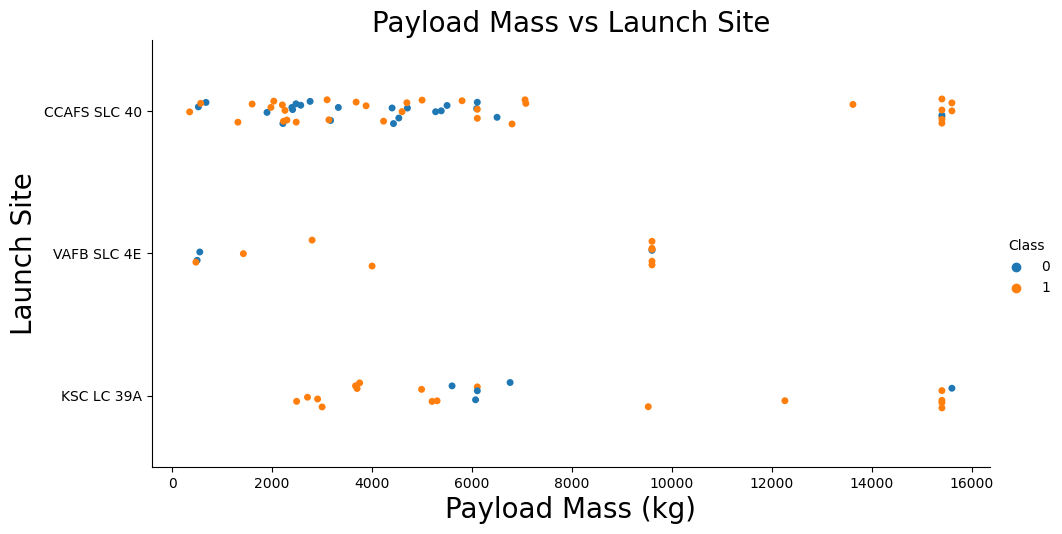

In [9]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value

sns.catplot(x="PayloadMass", y="LaunchSite", hue="Class", data=df, kind="strip", aspect=2)
plt.xlabel("Payload Mass (kg)", fontsize=20)
plt.ylabel("Launch Site", fontsize=20)
plt.title("Payload Mass vs Launch Site", fontsize=20)
plt.show()



Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


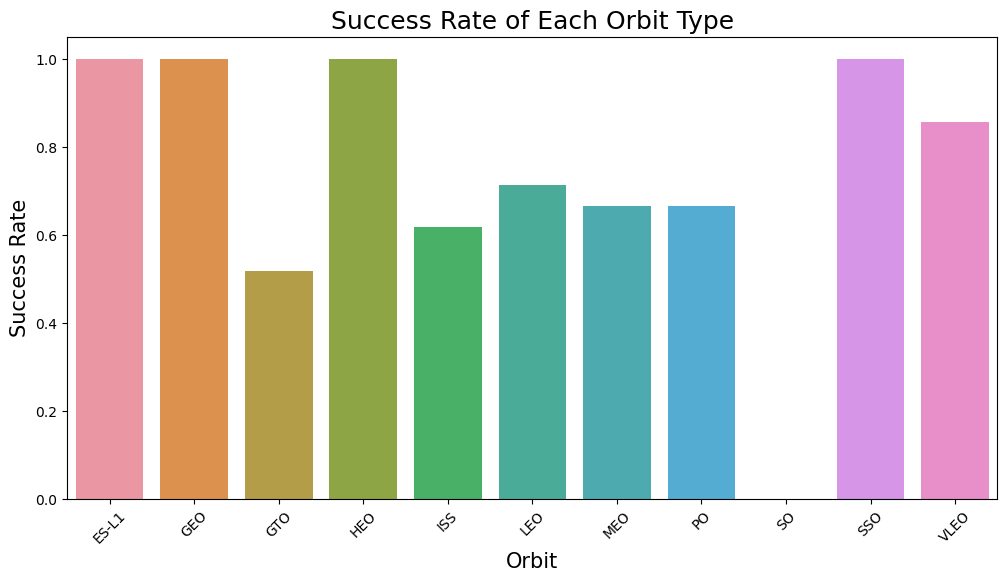

In [10]:
### TASK  3: Visualize the relationship between success rate of each orbit type
# Grouping by 'Orbit' and calculating the success rate
orbit_success_rate = df.groupby('Orbit')['Class'].mean().reset_index()

# Plotting the result
plt.figure(figsize=(12,6))
sns.barplot(x="Orbit", y="Class", data=orbit_success_rate)
plt.xlabel("Orbit", fontsize=15)
plt.ylabel("Success Rate", fontsize=15)
plt.title("Success Rate of Each Orbit Type", fontsize=18)
plt.xticks(rotation=45)
plt.show()


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


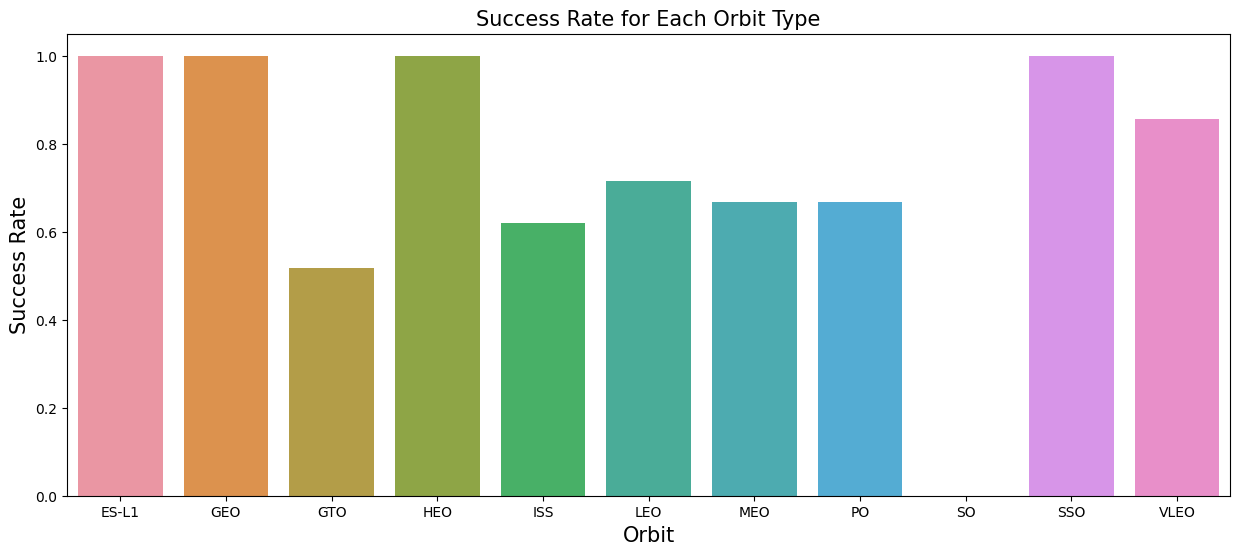

In [11]:
# HINT use groupby method on Orbit column and get the mean of Class column

orbit_success_rate = df.groupby('Orbit')['Class'].mean().reset_index()
orbit_success_rate

plt.figure(figsize=[15,6])
sns.barplot(x='Orbit', y='Class', data=orbit_success_rate)
plt.xlabel('Orbit', fontsize=15)
plt.ylabel('Success Rate', fontsize=15)
plt.title('Success Rate for Each Orbit Type', fontsize=15)
plt.show()


Analyze the ploted bar chart try to find which orbits have high sucess rate.


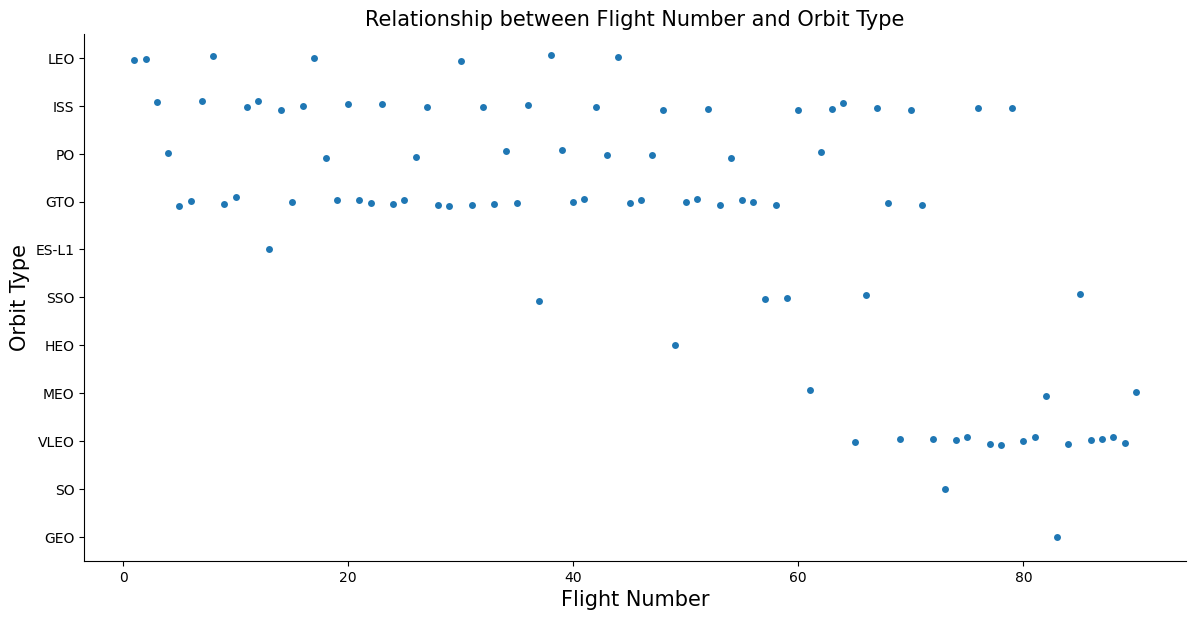

In [12]:
### TASK  4: Visualize the relationship between FlightNumber and Orbit type
sns.catplot(x="FlightNumber", y="Orbit", data=df, kind="strip", height=6, aspect=2)
plt.xlabel("Flight Number", fontsize=15)
plt.ylabel("Orbit Type", fontsize=15)
plt.title("Relationship between Flight Number and Orbit Type", fontsize=15)
plt.show()


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


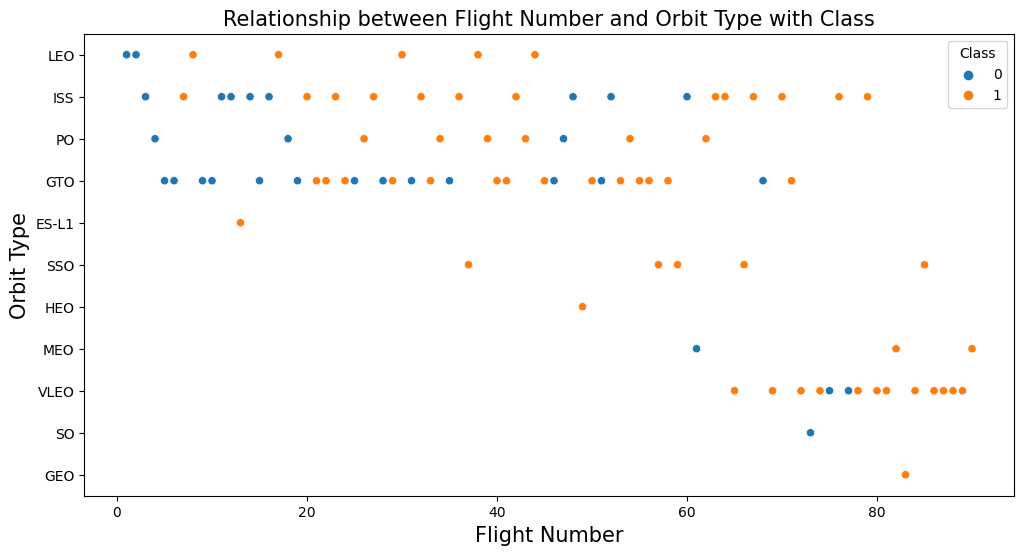

In [13]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
plt.figure(figsize=(12, 6))
sns.scatterplot(x="FlightNumber", y="Orbit", hue="Class", data=df)
plt.xlabel("Flight Number", fontsize=15)
plt.ylabel("Orbit Type", fontsize=15)
plt.title("Relationship between Flight Number and Orbit Type with Class", fontsize=15)
plt.show()


You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


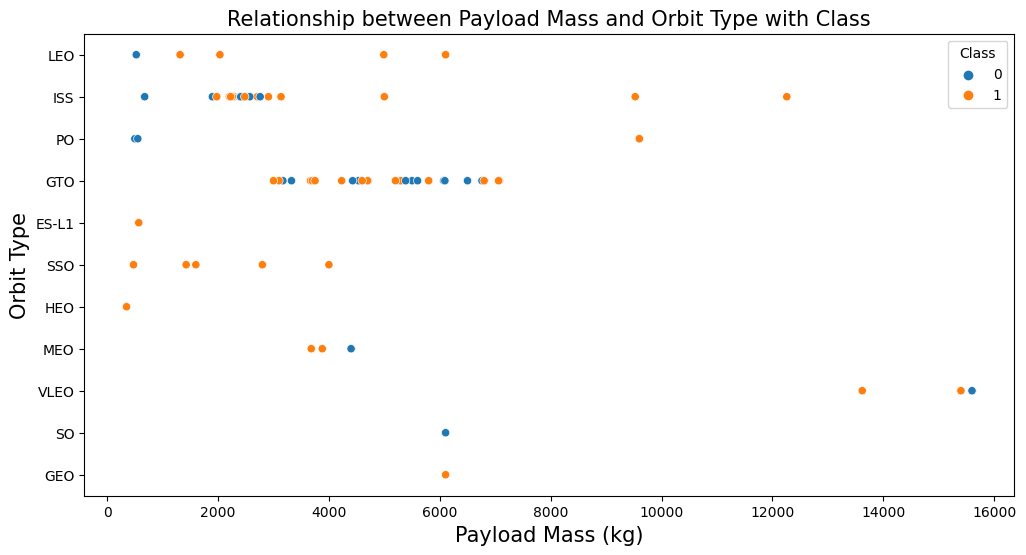

In [14]:
### TASK  5: Visualize the relationship between Payload and Orbit type
plt.figure(figsize=(12, 6))
sns.scatterplot(x="PayloadMass", y="Orbit", hue="Class", data=df)
plt.xlabel("Payload Mass (kg)", fontsize=15)
plt.ylabel("Orbit Type", fontsize=15)
plt.title("Relationship between Payload Mass and Orbit Type with Class", fontsize=15)
plt.show()


Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


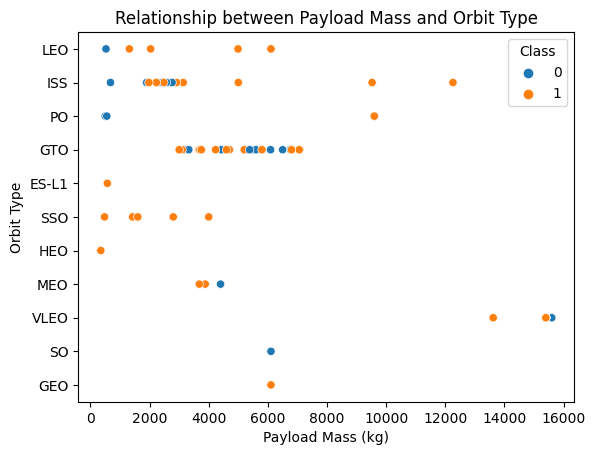

In [15]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
sns.scatterplot(x="PayloadMass", y="Orbit", hue="Class", data=df)
plt.xlabel("Payload Mass (kg)")
plt.ylabel("Orbit Type")
plt.title("Relationship between Payload Mass and Orbit Type")
plt.show()


With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.


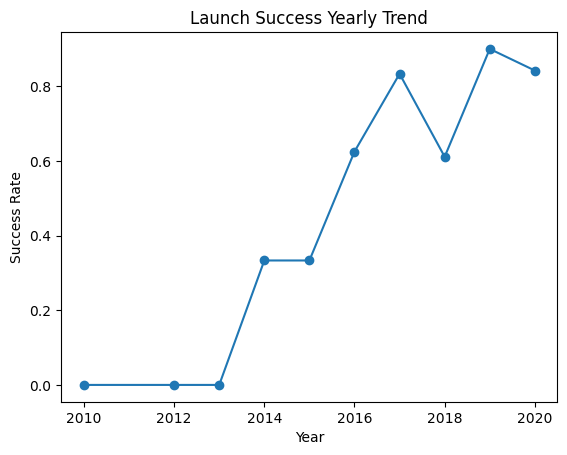

In [16]:
### TASK  6: Visualize the launch success yearly trend
# Convert the "Date" column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Extract the year
df['Year'] = df['Date'].dt.year

# Group by year and calculate the success rate
success_rate = df.groupby('Year')['Class'].mean()

# Plot the success rate over years
success_rate.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Success Rate')
plt.title('Launch Success Yearly Trend')
plt.show()


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function will help you get the year from the date:


In [ ]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()


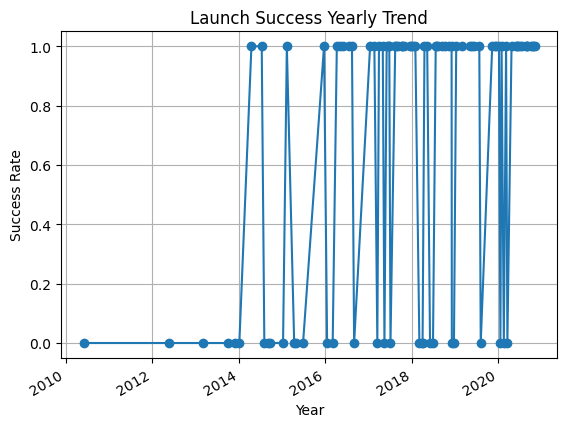

In [17]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate

# Group by year and calculate the success rate
success_rate = df.groupby('Date')['Class'].mean()

# Plot the success rate over years
success_rate.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Success Rate')
plt.title('Launch Success Yearly Trend')
plt.grid(True)
plt.show()



you can observe that the sucess rate since 2013 kept increasing till 2020


In [18]:
## Features Engineering
# One-hot encoding for categorical variable 'Orbit'
df = pd.get_dummies(df, columns=['Orbit'], drop_first=True)

# Binning Payload Mass into 3 categories
bins = [0, 1000, 5000, df['PayloadMass'].max()]
labels = ['Light', 'Medium', 'Heavy']
df['PayloadMassCategory'] = pd.cut(df['PayloadMass'], bins=bins, labels=labels)

# Standardizing 'PayloadMass' column
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['PayloadMassStandardized'] = scaler.fit_transform(df[['PayloadMass']])

# Displaying the modified DataFrame
df.head()


,FlightNumber,Date,BoosterVersion,PayloadMass,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,...,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,PayloadMassCategory,PayloadMassStandardized
0,1,2010-06-04,Falcon 9,6104.959412,CCAFS SLC 40,None None,1,False,False,False,...,0,0,1,0,0,0,0,0,Heavy,-1.948145e-16
1,2,2012-05-22,Falcon 9,525.000000,CCAFS SLC 40,None None,1,False,False,False,...,0,0,1,0,0,0,0,0,Light,-1.195232e+00
2,3,2013-03-01,Falcon 9,677.000000,CCAFS SLC 40,None None,1,False,False,False,...,0,1,0,0,0,0,0,0,Light,-1.162673e+00
3,4,2013-09-29,Falcon 9,500.000000,VAFB SLC 4E,False Ocean,1,False,False,False,...,0,0,0,0,1,0,0,0,Light,-1.200587e+00
4,5,2013-12-03,Falcon 9,3170.000000,CCAFS SLC 40,None None,1,False,False,False,...,0,0,0,0,0,0,0,0,Medium,-6.286706e-01


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [22]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit_GEO', 'Orbit_GTO', 'Orbit_HEO', 'Orbit_ISS', 'Orbit_LEO',
       'Orbit_MEO', 'Orbit_PO', 'Orbit_SO', 'Orbit_SSO', 'Orbit_VLEO', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()


,FlightNumber,PayloadMass,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,...,Orbit_VLEO,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,0,0,0,0,1,0,0,0,...,0,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,0,0,0,0,1,0,0,0,...,0,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,0,0,0,1,0,0,0,0,...,0,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,0,0,0,0,0,0,1,0,...,0,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,0,1,0,0,0,0,0,0,...,0,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [24]:
### TASK  7: Create dummy variables to categorical columns
# Create a new DataFrame with dummy variables for the categorical columns
features_dummies = pd.get_dummies(df, columns=['LaunchSite', 'BoosterVersion', 'Orbit_GEO', 'Orbit_GTO', 'Orbit_HEO', 'Orbit_ISS', 'Orbit_LEO',
       'Orbit_MEO', 'Orbit_PO', 'Orbit_SO', 'Orbit_SSO', 'Orbit_VLEO'])

# Print the new column names to understand the format of the dummy variables
print(features_dummies.columns)

# Select the columns you want for your features DataFrame
features = features_dummies[['FlightNumber', 'PayloadMass', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad',
       'Block', 'ReusedCount', 'Serial'] + [col for col in features_dummies.columns if 'LaunchSite_' in col or 'Orbit_' in col]]

features.head()




Index(['FlightNumber', 'Date', 'PayloadMass', 'Outcome', 'Flights', 'GridFins',
       'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial',
       'Longitude', 'Latitude', 'Class', 'Year', 'PayloadMassCategory',
       'PayloadMassStandardized', 'LaunchSite_CCAFS SLC 40',
       'LaunchSite_KSC LC 39A', 'LaunchSite_VAFB SLC 4E',
       'BoosterVersion_Falcon 9', 'Orbit_GEO_0', 'Orbit_GEO_1', 'Orbit_GTO_0',
       'Orbit_GTO_1', 'Orbit_HEO_0', 'Orbit_HEO_1', 'Orbit_ISS_0',
       'Orbit_ISS_1', 'Orbit_LEO_0', 'Orbit_LEO_1', 'Orbit_MEO_0',
       'Orbit_MEO_1', 'Orbit_PO_0', 'Orbit_PO_1', 'Orbit_SO_0', 'Orbit_SO_1',
       'Orbit_SSO_0', 'Orbit_SSO_1', 'Orbit_VLEO_0', 'Orbit_VLEO_1'],
      dtype='object')


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,...,Orbit_MEO_0,Orbit_MEO_1,Orbit_PO_0,Orbit_PO_1,Orbit_SO_0,Orbit_SO_1,Orbit_SSO_0,Orbit_SSO_1,Orbit_VLEO_0,Orbit_VLEO_1
0,1,6104.959412,1,False,False,False,NaN,1.0,0,B0003,...,1,0,1,0,1,0,1,0,1,0
1,2,525.000000,1,False,False,False,NaN,1.0,0,B0005,...,1,0,1,0,1,0,1,0,1,0
2,3,677.000000,1,False,False,False,NaN,1.0,0,B0007,...,1,0,1,0,1,0,1,0,1,0
3,4,500.000000,1,False,False,False,NaN,1.0,0,B1003,...,1,0,0,1,1,0,1,0,1,0
4,5,3170.000000,1,False,False,False,NaN,1.0,0,B1004,...,1,0,1,0,1,0,1,0,1,0


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [27]:
# HINT: Use get_dummies() function on the categorical columns

# List the columns you want to one-hot encode
columns_to_encode = ['LandingPad', 'Serial'] # Add 'LaunchSite' if it is in your DataFrame

# Make sure 'features' DataFrame contains the columns you want to encode
features_one_hot = pd.get_dummies(features, columns=columns_to_encode)

# Display the first few rows of the resulting DataFrame
features_one_hot.head()




,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,LaunchSite_CCAFS SLC 40,LaunchSite_KSC LC 39A,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
### TASK  8: Cast all numeric columns to `float64`
# Assuming 'features_one_hot' is the DataFrame with the one-hot encoded features
features_one_hot = features_one_hot.astype({col: 'float64' for col in features_one_hot.select_dtypes(['int64', 'float64']).columns})

# You can also print the dtypes to verify that all numeric columns are now float64
print(features_one_hot.dtypes)


FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins           bool
Reused             bool
                 ...   
Serial_B1056      uint8
Serial_B1058      uint8
Serial_B1059      uint8
Serial_B1060      uint8
Serial_B1062      uint8
Length: 89, dtype: object


Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [29]:
# HINT: use astype function
features_one_hot = features_one_hot.astype('float64')
print(features_one_hot.dtypes)



FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 89, dtype: object


We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


<code>features_one_hot.to_csv('dataset_part\_3.csv', index=False)</code>


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2022-01-01)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
